# **MCA572– Neural Networks and Deep Learning**

**Kalpana N**  
**2347229**

# **1. Data Preprocessing**

a. Load the CIFAR-10 Dataset

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


b. Normalize Pixel Values

In [18]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


c. One-Hot Encoding for Labels


In [19]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


d. Data Augmentation (Optional)


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


#  **2. Network Architecture Design**


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Input layer (32x32x3 image)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Hidden layer 1
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Hidden layer 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (10 classes)
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Display the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

**Question1:**
**Justify your choice of network architecture, including the number of layers, types of layers, and the number of neurons/filters in each layer.**  

**Justification**  
1.Convolutional Layers:Used To capture spatial hierarchies in images.  
2.MaxPooling: To reduce spatial dimensions and computational load.  
3.Dropout: To prevent overfitting.  
4.Fully Connected Layer: For classification.    
5.Softmax Output Layer: Converts logits into probabilities for multi-class classification.  



The network architecture starts with 32 filters to capture basic image features, gradually increasing to 64 and 128 filters for more complex patterns.Max pooling layers reduce the spatial dimensions, making computations efficient, while dropout layers (0.25 and 0.5) prevent overfitting. The fully connected layer with 256 neurons consolidates these features, and the softmax output layer classifies images into one of 10 classes. This design effectively balances feature extraction and generalization for CIFAR-10 classification.

# **3. Activation Functions**

**ReLU:**  
ReLU is chosen for hidden layers as it helps avoid the vanishing gradient problem and speeds up training by passing gradients for positive inputs while ignoring negative ones, reducing unnecessary computations.

**Softmax:**  
Softmax is used in the output layer to generate probabilities for multi-class classification, ensuring the outputs sum to one and aiding in efficient weight updates during backpropagation.

# **4. Loss Function and Optimizer**

a. Loss Functions

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


b. Optimizer

We use Adam as it adapts the learning rate and converges faster than traditional gradient descent.   

Learning Rate: Affects how large the steps are in updating weights. A learning rate too high may cause the model to overshoot; too low, and it might take too long to converge.

**Question:**  
How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?   

**Answer**  
The optimizer and learning rate are crucial for network convergence, as they dictate weight updates during training. If the model fails to converge, I would reduce the learning rate or use adaptive methods to stabilize training.

# **5. Training the Model**

In [25]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=2)


Epoch 1/50
782/782 - 99s - 127ms/step - accuracy: 0.3358 - loss: 1.7857 - val_accuracy: 0.4819 - val_loss: 1.4342
Epoch 2/50
782/782 - 141s - 180ms/step - accuracy: 0.4642 - loss: 1.4815 - val_accuracy: 0.5585 - val_loss: 1.2313
Epoch 3/50
782/782 - 95s - 122ms/step - accuracy: 0.5165 - loss: 1.3495 - val_accuracy: 0.5901 - val_loss: 1.1577
Epoch 4/50
782/782 - 95s - 121ms/step - accuracy: 0.5470 - loss: 1.2690 - val_accuracy: 0.6230 - val_loss: 1.0660
Epoch 5/50
782/782 - 95s - 121ms/step - accuracy: 0.5737 - loss: 1.2064 - val_accuracy: 0.6281 - val_loss: 1.0548
Epoch 6/50
782/782 - 98s - 125ms/step - accuracy: 0.5846 - loss: 1.1722 - val_accuracy: 0.6607 - val_loss: 0.9648
Epoch 7/50
782/782 - 139s - 177ms/step - accuracy: 0.5980 - loss: 1.1322 - val_accuracy: 0.6774 - val_loss: 0.9137
Epoch 8/50
782/782 - 95s - 121ms/step - accuracy: 0.6115 - loss: 1.1072 - val_accuracy: 0.6840 - val_loss: 0.9103
Epoch 9/50
782/782 - 142s - 182ms/step - accuracy: 0.6173 - loss: 1.0899 - val_accurac

**Question:**  
How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

**Explanation of Backpropagation:**  

Weight Updates: During each iteration, the gradients are computed via backpropagation, and weights are adjusted based on the learning rate.  

Learning Rate's Role: Determines the magnitude of weight updates. If it's too high, the model might not converge properly.

# **6. Model Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


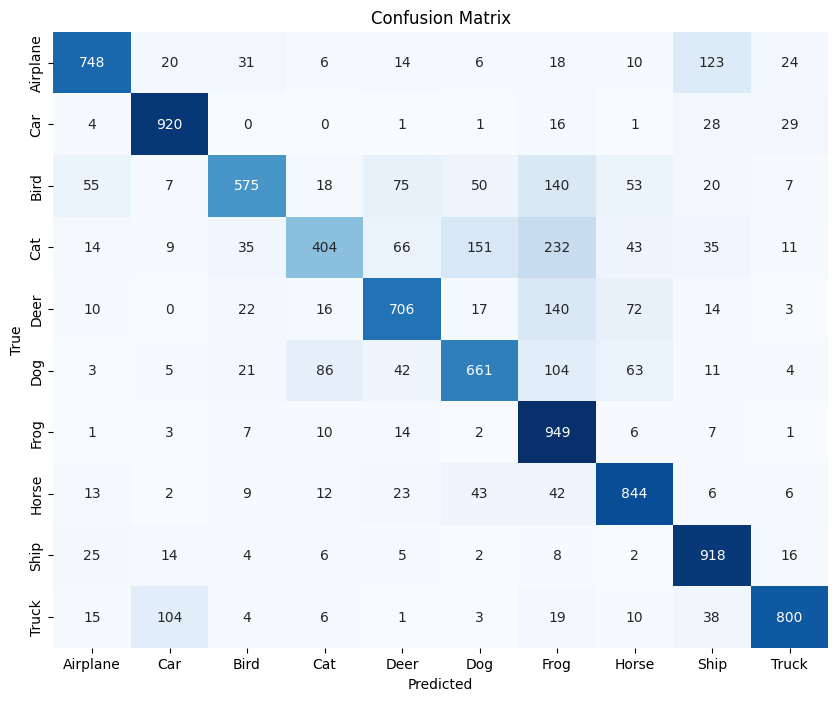


Classification Report:



,precision,recall,f1-score,support
0,0.84,0.75,0.79,1000.00
1,0.85,0.92,0.88,1000.00
2,0.81,0.57,0.67,1000.00
3,0.72,0.40,0.52,1000.00
4,0.75,0.71,0.73,1000.00
5,0.71,0.66,0.68,1000.00
6,0.57,0.95,0.71,1000.00
7,0.76,0.84,0.80,1000.00
8,0.77,0.92,0.83,1000.00
9,0.89,0.80,0.84,1000.00


In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
report = classification_report(y_true, y_pred_classes, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display Classification Report as Table
print("\nClassification Report:\n")
df_classification_report.style.format("{:.2f}").set_caption("Classification Report").background_gradient(cmap='Blues')


**Question:**    
How can you further improve model performance if the accuracy is low?  
**Answer**    
To improve model performance with low accuracy, techniques like data augmentation can enhance training data diversity, while hyperparameter tuning can optimize learning rates and batch sizes. Additionally, employing regularization methods and adjusting the model architecture can help reduce overfitting and improve overall accuracy.

# **7. Optimization Strategies**

a. Early Stopping

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


b. Learning Rate Scheduling

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)


c. Weight Initialization

In [36]:
from tensorflow.keras.initializers import HeNormal

# Modify Conv2D layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal()))


**Question:**   
Why is weight initialization important, and how does it impact the
convergence of your network?  

**Answer**  
Weight initialization is important because it influences the convergence speed and stability of neural networks. Proper initialization helps prevent issues like vanishing or exploding gradients, allowing the network to learn effectively and reach optimal performance more quickly.  

# **8. Report**

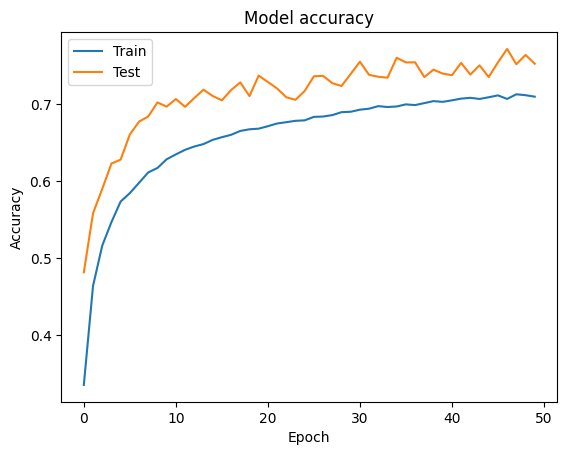

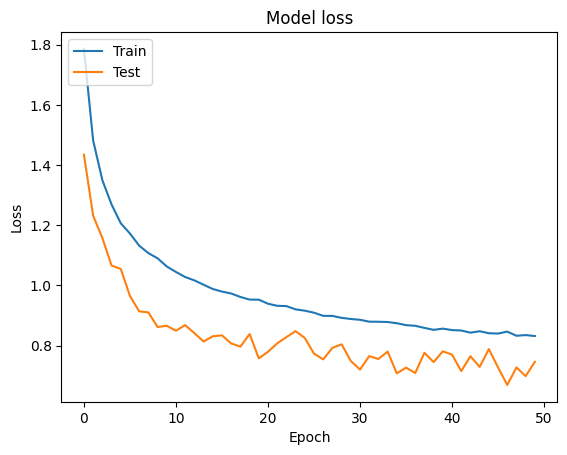

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Accuracy Plot: The training and validation accuracy should increase over time, although validation accuracy might plateau.   

Loss Plot: The training and validation loss should decrease, although validation loss might flatten or slightly increase if overfitting occurs.